# 8. Frequentist II: Hypothesis tests

In this session we continue with frequentist inference, exploring the concept of hypothesis testing and p-values. We discuss the general principle underlying a p-value, connections to confidence intervals and common misinterpretations and misuses of p-values. 


<div class="alert alert-block alert-warning">
<b> Intended learning outcomes</b> 
    
By the end of this session you will be able to:

* describe the meaning of the terms null and alternative hypotheses 
* describe what a p-value is
* correctly interpret a p-value
* explain the connection between 95% confidence intervals and p-values
* describe the calculation of a p-value
</div>


This session does not cover the mathematical derivation underlying hypothesis tests and common test statistics. Our intention is not to equip you with the ability to construct novel hypothesis tests. The purpose of this session is rather to convey an understanding of what a hypothesis test is, what a p-value is and how to interpret p-values correctly.

## 8.1 Proving and disproving hypotheses

This session considers the concept of testing hypotheses. Let's consider a very simple example. Suppose we believe that all men are over 120cm tall. We could:
- *Prove* the hypothesis by finding every man and showing they are more than 120cm tall
- *Disprove* the hypothesis by finding a single man less than 120cm tall

> It is easier to find evidence against a hypothesis than to prove it to be correct.  

The general approach we will take is as follows. We start with a **null hypothesis**, which is typically a statement about the population value of parameters. This will often be a statement of "no difference". Some examples might be: 

- Exposure to passive smoking is not associated with subsequent risk of lung cancer.
- Treatment A does not improve survival compared with placebo
- The mean body mass index (BMI) in England is the same as the mean BMI in Scotland.

We assume that our null hypothesis holds, i.e. that our sample of data came from a population in which our null hypothesis is true. We then look for evidence, in our sample data, against the null hypothesis (i.e. to falsify the hypothesis). 

For example, suppose our null hypothesis is that the mean BMI is the same in England and Scotland and that we have a random sample of adults from England and Scotland. If we assume our null hypothesis is true (the two populations have the same mean BMI), then we would expect our two samples to have similar means. If, in fact, we observed very different sample means in the two sample groups then we would take this as *evidence against our null hypothesis*.


## 8.2 Example: Emotional distress in violence researchers

To explore the concept of hypothesis testing, we will return to the example of emotional distress among violence researchers. The researchers were randomly assigned to receive an intervention (group debriefing aimed at reducing emotional distress) or control (nothing). At the end of the intervention, 22 researchers in the intervention group and 26 researchers in the control group filled in a questionnaire measuring emotional distress. The score gives a value of 0-20, with higher scores indicating higher distress. 

The sample mean scores and their standard deviations in the two groups are:

* Control group ($n_0$=26), sample mean emotional distress score (sample standard deviation):  $\bar{x}_0 = 6.35$, (SD = 1.87)
* Intervention group ($n_1$=22), sample mean emotional distress score (sample standard deviation):  $\bar{x}_1 = 5.45$, (SD = 1.87)

The research question we consider in this session is:

> Is the true mean emotional distress score is different in the intervention and control group?

The population parameter of interest is therefore the difference between the population mean emotional distress score in the intervention and control groups.  

Aside: as is often the case, the population is a bit hard to define here. We can think about it as being the wider population of people who could be given the intervention (or not).


The code below reads in the data, obtains the sample means and SDs and draws histograms of the scores in each group. 

[1] "Sample means: "


[1] 6.346154

[1] 5.454545

[1] "Sample SDs: "


[1] 1.874936

[1] 1.87025

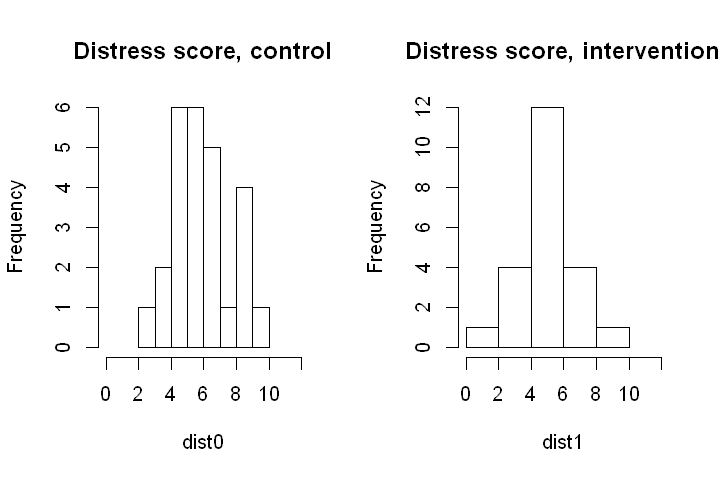

In [1]:
# Read in data (emotional distress scores in control and intervention group)
dist0 <- c(5, 2, 5,  7,  6,  7,  7,  5,  8,  6,  6,  9,  4,  5,  9,  7,  9,  5,  6, 10,  9,  4,  6,  6,  5,  7)
dist1<- c(5,  5,  6,  6, 1,  5, 10,  7,  3,  6,  7,  8,  6,  7,  5,  4,  5,  6,  4,  6,  3,  5)

# Calculate sample means 
print("Sample means: ")
mean(dist0)
mean(dist1)

# Calculate sample standard deviations 
print("Sample SDs: ")
sqrt(var(dist0))
sqrt(var(dist1))

# Draw histograms of the scores in each group
options(repr.plot.width=6, repr.plot.height=4)
par(mfrow=c(1,2))
hist(dist0, main="Distress score, control", xlim=c(0, 12))
hist(dist1, main="Distress score, intervention", xlim=c(0, 12))

### 8.2.1 Statistical model

We will let $Y_{0,1}, ...,Y_{0,26}$ be random variables representing the emotional distress scores of the 26 sampled researchers in the control group and $Y_{1,1}, ...,Y_{1,22}$ be random variables representing the emotional distress scores of the 22 sampled researchers in the intervention group. So the first subscript denotes the group (0=control, 1=intervention) and the second is an index for the person (i=1, ..., 26 in the control group; i=1,...,22 in the intervention group).

We will let $y_{0,1}, ...,y_{0,26}$ and $y_{1,1}, ...,y_{1,22}$ represent the realised values of these random variables (i.e. the observed emotional distress scores).  

We will assume that all random variables are independent of each other. The emotional distress scores in the control group are all drawn from the same normal distribution, with population mean $\mu_0$ and population standard deviation  $\sigma$. For now, we suppose $\sigma$ is a known value, with $\sigma = 1.75$. The emotional distress scores in the intervention group are assumed to be drawn from a normal distribution with population mean $\mu_1$ and the same population standard deviation.  

This model can be compactly written as follows

$$ 
Y_{j,i} \overset{\small{iid}}{\sim} N(\mu_j, 1.75^2), \qquad i=1,2,...,n_j
$$

The population parameter we are interested in is

$$
\delta = \mu_1 - \mu_0
$$

The obvious estimator for this is the sample difference in means

$$
\hat{\delta} = \bar{Y_1} - \bar{Y_0} = \frac{1}{n_1} \sum_{i=1}^{n_1} Y_{1,i} - \frac{1}{n_0} \sum_{i=1}^{n_0} Y_{0,i}
$$

And the sample estimate is:

$$
\bar{y_1} - \bar{y_0} = \frac{1}{n_1} \sum_{i=1}^{n_1} y_{1,i} - \frac{1}{n_0} \sum_{i=1}^{n_0} y_{0,i}
$$



### 8.2.2  Emotional distress example: the null hypothesis

The **null hypothesis** is that there is no difference in the population mean emotional distress score in the intervention and control groups. Formally, we write:

$$
H_0:  \delta = 0
$$

The **alternative hypothesis** (sometimes written $H_1$ or $H_A$) is that the null hypothesis is not true:

$$
H_1: \delta \neq 0
$$

In our sample, we have seen that $\hat{\delta} = -0.892$. So the sample mean emotional distress score is lower in the intervention group (which is the direction we might be hoping for, since this group have received a form of counselling to reduce their emotional distress). However, the two sample means are very unlikely to be exactly equal, even if the true mean emotional distress score is the same in the two groups, due to sampling variability (i.e. due to random chance). So how should we interpret this sample difference in means? Does it constitute evidence against our null hypothesis? 

In order to answer this question, we need to consider the sampling distribution of the difference in means. Unlike in previous sessions, where we used the sampling distribution to obtain confidence intervals, we are now interested in a subtly different sampling distribution: the sampling distribution that we would see *if the null hypothesis were true*. 

### 8.2.3 Sampling distribution for the difference in sample means

Under the statistical models above, if $\sigma$ is a known value it is straightforward to derive the sampling distribution of the estimator (the difference in sample means between groups). 

> Linear combinations of independent normal distributions are also normal

Thus the distribution of $\hat{\delta}$ is normal. We can then calculate its expectation and variance using techniques from the Maths Refresher to obtain:

$$
\hat{\delta} \sim N\left(\delta, \sigma^2 \left(\frac{1}{n_1} + \frac{1}{n_0} \right) \right)
$$


Substituting in the values $\sigma = 1.75$, $n_0 = 26$ and $n_1 = 22$, we have

$$
\hat{\delta} \sim N\left(\delta, 1.75^2 \left(\frac{1}{22} + \frac{1}{26} \right) \right) = N(\delta,  0.507^2)  
$$

So the expectation of the sampling distribution is the true population value $\delta$ and the standard error is $0.507$. Remember that because we are considering the distribution of an estimator, we call the standard deviation of the estimator (the square root of the variance) the standard error. 


### 8.2.4 Sampling distribution under the null hypothesis

We are interested in the distribution of the difference in sampling means would look like under repeated sampling *if the null hypothesis were true*. The null hypothesis states that $\delta = 0$. Therefore, under the null hypothesis, 

$$
\hat{\delta} \sim  N(0,  0.507^2) 
$$


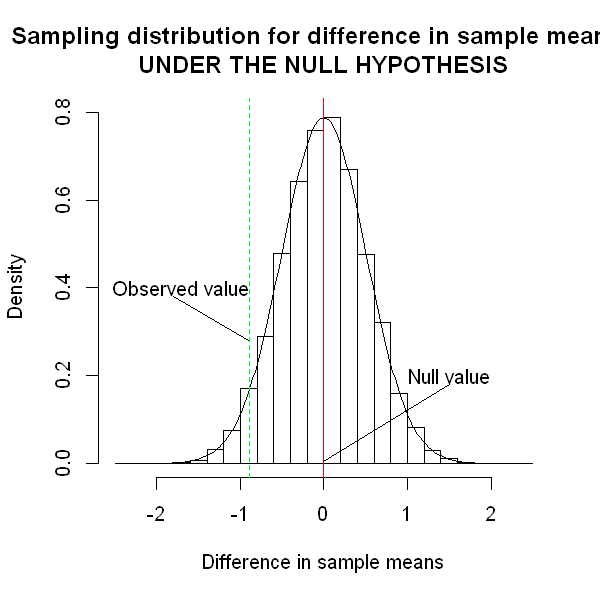

In [2]:
# Sample difference in means
delta.hat <- mean(dist1) - mean(dist0)

# Randomly generate 10000 sample differences in means (following the sampling distribution under the null hypothesis)
sample.diff.means <- rnorm(10000, 0, 0.507)

# Draw the approximate sampling distribution with the percentile confidence limits marked in red
options(repr.plot.width=5, repr.plot.height=5)
hist(sample.diff.means, freq=FALSE, main="Sampling distribution for difference in sample means, \nUNDER THE NULL HYPOTHESIS", xlab="Difference in sample means", xlim=c(-2.5, 2.5), ylim=c(0, 0.8))
lines(seq(-2.5, 2.5, 0.025), dnorm(seq(-2.5, 2.5, 0.025), 0, 0.507))
abline(v=0, col="red")
abline(v=delta.hat, col="green", lty=2)

text(1.5, 0.2, "Null value")
text(-1.7, 0.4, "Observed value")
lines(c(0, 1.5), c(0.005, 0.18))
lines(c(-1.8, -0.9), c(0.38, 0.28))

The sampling distribution above shows us the distribution of the differences in sample means that we could have seen under repeated sampling, i.e. if we had done the same study a very large number of times. The question we must ask now is: is the value we have seen consistent with this sampling distribution? Or is it surprising? A "surprising" result is taken as evidence against the null hypothesis. In order to clarify these ideas, consider two scenarios that could have happened.

Scenario 1: Suppose we had done exactly the same study, but had seen a difference in sample means of $\hat{\delta} = -3.5$ (i.e. the intervention group sample mean score was 3.5 units lower than the control group mean). 

Scenario 2: Suppose we had done this study, but had actually seen a difference in sample means of $\hat{\delta} = 0.02$. 

What would we conclude in these scenarios? The histogram above is shown below for the two scenarios. 

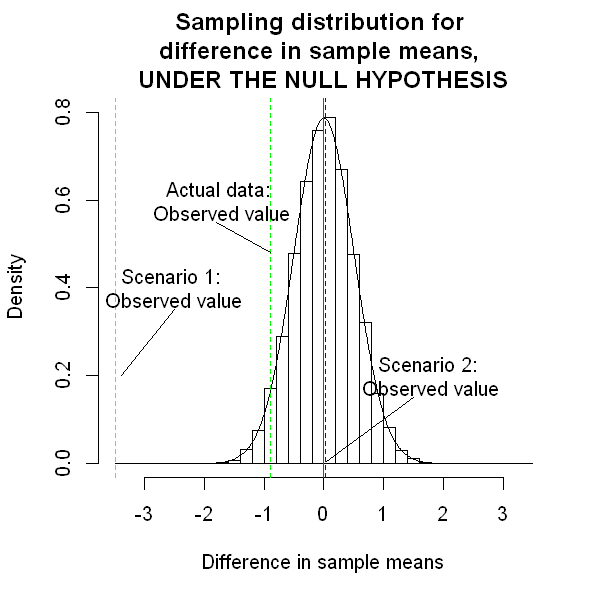

In [3]:
# Draw the approximate sampling distribution with the percentile confidence limits marked in red
options(repr.plot.width=5, repr.plot.height=5)
hist(sample.diff.means, freq=FALSE, main="Sampling distribution for \ndifference in sample means, \nUNDER THE NULL HYPOTHESIS", xlab="Difference in sample means", ylim=c(0, 0.8), xlim=c(-3.5, 3.5))
lines(seq(-3.5, 3.5, 0.025), dnorm(seq(-3.5, 3.5, 0.025), 0, 0.507))
abline(v=0, col="red")
abline(v=delta.hat, col="green", lty=2)
abline(v=-3.5, col="orange", lty=2)
abline(v=0.02, col="blue", lty=2)

text(-2.5, 0.4, "Scenario 1: \nObserved value")
text(1.8, 0.2,  "Scenario 2: \nObserved value")
text(-1.7, 0.6, "Actual data: \nObserved value")
lines(c(0.05, 1.5), c(0.005, 0.15))
lines(c(-2.5, -3.4), c(0.35, 0.2))
lines(c(-1.8, -0.9), c(0.55, 0.48))

**Scenario 1** We can see from the histogram that, under the null hypothesis, the probability of seeing a difference in sample means of -3.5 or less is incredibly low. In fact, this probability is less than 1 in 10,000. So if we did 10,000 studies we would expect only one of them to have a difference in sample means of -3.5 or less. 

- So, have we been very unlucky and picked a very very unusual sample by chance? 
- Or is our initial premise incorrect? Is the null hypothesis wrong? 

This particular sample mean difference appears to be inconsistent with our null hypothesis. We interpret these "surprising" sample statistics as evidence against the null hypothesis.

**Scenario 2** Again, the histogram shows quite clearly that, under the null hypothesis, many of the samples that we could have obtained would give us a sample mean difference close to zero. So this sample difference is completely consistent with the null hypothesis. 

In this case, we would conclude that there is no evidence against the null hypothesis.

**Our actual observed data** Our observed sample mean difference (-0.892) is somewhere in between. In fact, we can calculate the probability of observing a sample mean difference of -0.892 or lower (i.e. the proportion of the area of the histogram that lies to the left of -0.89): this turns out to be 4%. So under repeated sampling, if our null hypothesis is true and there is truly no difference between the mean emotional distress score in the intervention and control groups, then we would expect to see a difference at least this big 4% of the time. 

In fact, we typically consider the proportion of samples in which we would get an estimate at least as extreme as the one we did get *in either direction*. In our case, this is the probability of seeing a sample mean difference of less than -0.892 or greater than +0.892. Under the null hypothesis, approximately 8% of samples would produce a sample mean difference at least as extreme as the one we have seen in our sample. 

So we had around a 1 in 13 chance of ending up with this result, if the null hypothesis is true. We interpret this as  weak evidence against the null hypothesis.


## 8.3 The p-value

The p-value is defined as the probability of observing the sample estimate or a more extreme one (in either direction) given that the null hypothesis is true. 


<div class="alert alert-block alert-info">
<b>Notes:</b> 
    
We have described what is called a *two-sided test*. Occasionally, a *one-sided test* might be used, where the p-value is the probability of results that are as extreme, or more extreme, *in the same direction* as the observed result. However, it is rare that it is justifiable to ignore sample statistics in one direction, so we will focus on two-sided tests.

When the sampling distribution is not symmetric, it can be hard to define what is *as extreme as* the estimate we have seen. In this case, there are various ways of obtaining the two-sided p-value. We do not pursue this further.
</div>


The smaller the P-value, the lower the chance of getting a difference as big  as the one observed if the null hypothesis is true.

Therefore, the smaller the P-value,  the stronger the evidence against the null hypothesis.

<img src="pvalues.png" alt="Interpretation of p-values" width="200"/>

The value of 0.05 has historically been used as a cut-off, with values of $p<0.05$ deemed "statistically significant" and values of $p\geq 0.05$ "not significant". As discussed further below, we do not recommend dichotomising p-values in this way.

## 8.4 Connection between p-values and confidence intervals



Recall that we previously used the following fact:
> For a normal distribution, approximately 95% of observations are contained within 1.96 standard deviations of the mean. 

Which, applied to sampling distributions, tells us that:
> For a normally distributed sampling distribution that is centred around the true population value, 95% of the estimates obtained under repeated sampling would be contained within 1.96 standard errors of the true population value

Applying this to the estimator $\hat{\delta}$, this leads to a 95% confidence interval of 

$$
\hat{\delta} \pm  1.96 \times SE(\delta)
$$

The graph below shows some possible values of $\hat{\delta}$, along with their 95% confidence intervals. We see that:

- if $\hat{\delta}$ is exactly equal to the number $1.96 \times  SE(\delta)$ then the 95% confidence interval just touches zero.
- if $\hat{\delta} > 1.96 \times  SE(\delta)$ then the 95% confidence interval does not include zero - the whole interval lies above zero. 
- if $0 < \hat{\delta} < 1.96$  then the 95% confidence interval does include zero. 

So what p-values would these values of $\hat{\delta}$ result in? 

- if $\hat{\delta} = 1.96 \times  SE(\delta)$ then we know that 2.5% of the estimates lie above that point, so p=0.05.
- if $\hat{\delta} > 1.96 \times  SE(\delta)$ then fewer than 2.5% of estimates lie above $\hat{\delta}$, so p<0.05
- if $0 < \hat{\delta} < 1.96 \times  SE(\delta)$ then more than 2.5% of estimates lie above $\hat{\delta}$, so p>0.05

This leads us to the connection between 95% confidence intervals and p-values. When a 95% confidence interval and p-value are obtained from the same sampling distribution (which is typically the case when both are presented), 



|  P-value  |  95% confidence interval  |
|---- | ---- |
| $<0.05$ | Excludes the null value |
| $\geq 0.05$ | Contains the null value |



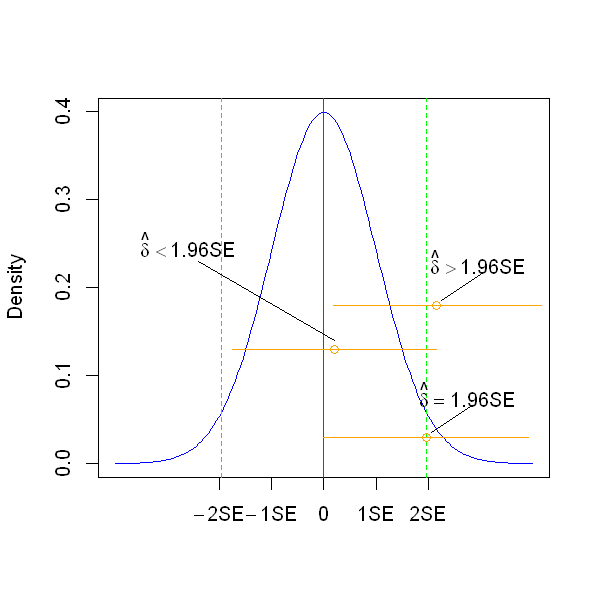

In [4]:
# Labels for graph
lab1 <- expression(- 2*SE)
lab2 <- expression(- 1*SE)
lab3 <- expression(1*SE)
lab4 <- expression(2*SE)

# Draw sampling distribution
options(repr.plot.width=5, repr.plot.height=5)
plot(seq(-4, 4, by=.05), xaxt="none",  xlab=" ", ylab="Density", 
     dnorm(seq(-4, 4, by=.05), 0, 1), col="blue", type = "l")
axis(1, seq(-2, 2, by=1), labels=c(lab1, lab2, 0, lab3, lab4))

# True population value
abline(v=0, col="red")
# 1.96 SE from population value
abline(v=c(-1.96, 1.96), col="green", lty=2)

# Some 95% confidence intervals
points(c(0.2, 1.96, 2.15), c(0.13, 0.03, 0.18), col = "orange")

lines(c(-1.76, 2.16), c(0.13, 0.13), col="orange")
lines(c(0, 3.92), c(0.03, 0.03), col ="orange")
lines(c(0.19, 4.17), c(0.18, 0.18), col ="orange")

text(2.75, 0.08, expression(hat(delta)==1.96*SE))
text(-2.6, 0.25, expression(hat(delta)<1.96*SE))
text(2.95, 0.23, expression(hat(delta)>1.96*SE))

lines(c(2.25, 3), c(0.185, 0.215), col="black")
lines(c(2.05, 2.8), c(0.035, 0.065), col="black")
lines(c(-2.4, 0.2), c(0.23, 0.14), col="black")


## 8.5 P-values as decision rules

Traditionally, hypothesis tests have been thought of as a means to make decisions. In this paradigm, a cut-off (typically p<0.05) is chosen. If the p-value is smaller than the chosen cut-off, the null hypothesis is rejected. If the p-value is above the cut-off then the null hypothesis is accepted. This leads to the terminology of: 
- "Type I error", rejecting the null hypothesis when it is true
- "Type II error", accepting the null hypothesis when it is false

Linked to this approach is the habit of labelling p-values < 0.05 as "significant" and those larger as "non-significant". 

There are some instances where this decision-making paradigm seems appropriate. Some health data science research is indeed concerned with decision making. For example, we may wish to carry out a trial to assess whether a particular clinical decision support system improves the clinicians' ability to detect malignant tumours. However much health data science research is not, at least directly, concerned with decision making. For example if we carry out an epidemiological study in which we relate risk of a particular disease to gender, we do this because we are interested in understanding the aetiology of the disease, not because we want to assess whether to modify gender! For this reason many researchers regard p-values as a measure of strength of evidence against the null hypothesis, rather than as an aid to decision
making. 

In general, we do not advocate any approach which dichotomises p-values. There is very little difference, in terms of the information contained about the population parameter, between the two p-values of $p=0.049$ and $p=0.051$. Therefore it seems counter-intuitive to make very different decisions based on these p-values.

P-values represent an area of substantial philosophical controversy in statistics. We choose to interpret the p-value as a measure of strength of evidence against the null hypothesis. It should, however, be pointed out that some statisticians advocate strongly against this interpretation. 

In much health data science research, we are interested in knowing more about a particular population parameter. Many health data scientists, therefore, choose to focus on obtaining and interpreting estimates and confidence intervals rather than calculating p-values. 

## 8.6 Misinterpretations of p-values

The p-value is the subject of a lot of argument, debate and controversy, both within the statistical world and beyond. The following warn against some common misinterpretations and mis-uses of p-values:

- Do not believe that an association or effect exists just because it was statistically significant.
- Do not conclude that an association or effect is absent just because it was not statistically significant.
- Don’t base conclusions solely on whether an association or effect was statistically significant or not.
- In particular, do not conclude anything about scientific or practical importance based on statistical significance (or lack thereof).
- Do not interpret a p-value as the probability that chance alone produced the observed association or effect or the probability that the null hypothesis is true.

Importantly, statistical significance was never meant to imply scientific or clinical importance. As well as the p-value, always consider the estimated effect of the population parameter of interest and its confidence interval. These will often provide more insight than the p-value alone. 


## 8.7 Example: Calculation of the p-value

In the emotional distress example, our difference in sample means is $\hat{\delta} = -0.892$. 
We are interested in the distribution of the difference in sampling means would look like under repeated sampling *if the null hypothesis were true*. The null hypothesis states that $\delta = 0$. Therefore, under the null hypothesis, 

$$
\hat{\delta} \sim  N(0,  0.507^2) 
$$


The easiest way to do this calculation is to standardise the estimator to follow a standard normal distribution, i.e.

$$
Z = \frac{\hat{\delta}}{0.507} \sim  N(0, 1) 
$$

In our sample, we get a value of $Z=-0.892/0.507 = -1.76$. The p-value is defined as

$$
p = Pr( | \hat{\delta} | \geq  -0.892) = Pr( | Z | \geq   1.76)
$$

The standard normal distribution is symmetric, so this is equal to $2 \times P(Z \geq 1.76)$. This probability can be looked up using pre-calculated tables stored in all standard statistical software. 

In [5]:
# Manual calculation of p-value: 
2*(1-pnorm(1.76))

[1] 0.07840781

## 8.8 Approximate tests in large samples

More generally, suppose that the random variable used to calculate our p-value (above, the random variable was the  difference in sample means) is denoted by $R$ and that it has an expected value and variance (under the null hypothesis) denoted by $E(R)$ and $Var(R)$. Then define:

$$
Z = \frac{R - E[R]}{\sqrt{Var(R)}} = \frac{R - E[R]}{SE(R)} 
$$

where $SE(R)$ is the standard error of $R$ (the standard deviation of the sampling distribution; alternatively the square root of the variance of $R$). To simplify this even further, in many cases, as for the difference in sample means, $E(R) = 0$.

Thanks to the Central Limit Theorem, in almost all situations, as the sample size $n$ becomes large, the distribution of $Z$ tends towards a standard normal distribution. 

$$
lim_{n\rightarrow \infty} \ \  Z \sim N(0, 1). 
$$

The standard normal distribution can then be used to calculate the two-sided p-value, as above.

## 8.9 The two-sample t-test

Let us return to the comparison in population means between two groups. When, as is more typical, we do not know the value of $\sigma$, we need to replace it with an estimate from our sample, $\hat{\sigma}$. Typically we use an estimate based on the sample standard deviations in the two groups, $s_1$ and $s_0$:

$$
\hat{\sigma}^2 = \frac{(n_1 - 1) s_1^2 + (n_0 - 1) s_0^2}{n_1 + n_0 - 2}
$$ 

For our sample of data, $\hat{\sigma} = 1.873$. The sampling distribution we used above involves the true population standard deviation

$$
\hat{\delta} \sim N\left(\delta, \sigma^2 \left(\frac{1}{n_1} + \frac{1}{n_0} \right) \right)
$$

Similarly, the equivalent version of the sampling distribution (which we will find it easier to modify for our current purposes), is also no longer exactly true:

$$
\frac{\hat{\delta} - \delta}{\sigma \sqrt{\left(\frac{1}{n_1} + \frac{1}{n_0}\right) }}\sim N(0,1)
$$


This is only approximately true if we substitute the sample estimate $\hat{\sigma}$ into the equation. A little more algebra (not shown here), however, gives us an exact distribution.


$$
\frac{\hat{\delta} -\delta}{\hat{\sigma} \sqrt{\frac{1}{n_1} + \frac{1}{n_0}}} \sim t_{n_1 + n_0 - 2}
$$

Under the null hypothesis, $\delta = 0$, giving


$$
T = \frac{\hat{\delta}}{\hat{\sigma} \sqrt{\frac{1}{n_1} + \frac{1}{n_0}}} \sim t_{n_1 + n_0 - 2}
$$

Substituting in the numbers from our sample of data, 

$$
T = \frac{-0.892}{1.873 \sqrt{\frac{1}{22} + \frac{1}{26}}} 
$$

gives $t = -1.644$ (remembering that $T$ is the random variable and $t$ here is the realised (observed) value of that statistic). T-distributions are symmetric around zero, so we take *at least as extreme as* to mean less than -1.64 or greater than +1.64, which in turn is twice the probability of being less than -1.64. We simply need to calculate this probability for a t-distribution with 46 degrees of freedom (where we obtained 46 as $n_1 + n_0 - 2$). 

The code below performs this calculation and then uses an inbuilt R package to obtain the same p-value.

In [6]:
# Manual calculation of p-value (two equivalent calculations)
2*pt(-1.644, 46)

# T-test using inbuilt R package
dist <- c(dist0, dist1) 
gp <- c(rep(0, 26), rep(1, 22))

t.test(dist~gp, var.equal=TRUE)

[1] 0.1069945


	Two Sample t-test

data:  dist by gp
t = 1.6435, df = 46, p-value = 0.1071
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2004223  1.9836391
sample estimates:
mean in group 0 mean in group 1 
       6.346154        5.454545 


Rounding to 2 decimal places, the p-value is 0.11. 

In the output from the R package, the line

` t = 1.6435, df = 46, p-value = 0.1071 `

tells us that the value of the statistic $T$ above is $t=1.64$ in this sample, the degrees of freedom tell us that we are looking at a t-distribution on 46 degrees of freedom. We are also given a 95% confidence interval for the population difference in means: (-0.20 to 1.98). As we noted above, when the p-value is >0.05 then the null value (here, zero) will be included in the 95% confidence interval. 

## 8.10 Other hypothesis tests

You will meet many types of hypothesis tests over your statistical studies. Many, like the t-test above, are constructed around a particular estimator and so there is a nice connection between the estimate, the 95% confidence interval and the p-value from the hypothesis test. Where this is the case, it is good practice to present the estimate and confidence interval alongside the p-value, since they contain much more information than the p-value alone. 

In other cases, tests can be constructed without a specific parameter being estimated. The chi-squared test is a very commonly-used test. It tests the null hypothesis of no association between two unordered categorical variables. This test does not directly invoke the sampling distribution of an estimator, so typically only the p-value is presented, rather than also presenting an estimate and confidence interval.

In general, hypothesis testing is a controversial and widely misunderstood area of frequentist statistics. Where possible, focusing on estimating parameters along with confidence intervals can avoid some of the more damaging misuses of p-values.

## Further reading


Stang A, Poole C, Kuss O. The ongoing tyranny of statistical significance testing in biomedical research. Eur J Epidemiol. 2010;25(4):225-230. doi:10.1007/s10654-010-9440-x

Ronald L. Wasserstein & Nicole A. Lazar (2016) The ASA Statement on p-Values: Context, Process, and Purpose, The American Statistician, 70:2, 129-133, DOI: 10.1080/00031305.2016.1154108

Ronald L. Wasserstein, Allen L. Schirm & Nicole A. Lazar (2019) Moving to a World Beyond “p < 0.05”, The American Statistician, 73:sup1, 1-19, DOI: 10.1080/00031305.2019.1583913
